# Evaluation of relationship between linguistic complexity measures and writing quality

### Read ASAP Dataset

In [28]:
import pandas as pd
df_essays = pd.read_csv('ASAP/training_set_rel3.tsv', sep='\t',  encoding='ISO-8859-1')
mask = (df_essays['essay_set'] == 1)
df_essays_set_1 = df_essays[mask]
df_essays_set_1.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Read syntactic complexity scores

In [31]:
df_syntactic_complexity = pd.read_csv('ASAP/Preprocessed/scores.csv')
df_syntactic_complexity.head()

,Filename,W,S,VP,C,T,DC,CT,CP,CN,...,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
0,1053.txt,217,18,41,34,18,16,11,11,24,...,2.2778,1.8889,0.4706,0.8889,1.0000,0.6111,0.6111,0.3235,1.3333,0.7059
1,1735.txt,382,30,69,43,31,13,11,10,40,...,2.2258,1.3871,0.3023,0.4194,1.0333,0.3548,0.3226,0.2326,1.2903,0.9302
2,1721.txt,430,21,66,48,28,23,15,6,42,...,2.3571,1.7143,0.4792,0.8214,1.3333,0.5357,0.2143,0.1250,1.5000,0.8750
3,1047.txt,542,31,72,58,35,20,18,20,54,...,2.0571,1.6571,0.3448,0.5714,1.1290,0.5143,0.5714,0.3448,1.5429,0.9310
4,1709.txt,264,13,55,46,16,27,11,6,23,...,3.4375,2.8750,0.5870,1.6875,1.2308,0.6875,0.3750,0.1304,1.4375,0.5000


In [32]:
df_syntactic_complexity['Filename'] = df_syntactic_complexity.apply(lambda row : row['Filename'][:-4], axis = 1)

In [33]:
df_syntactic_complexity['Filename'] = df_syntactic_complexity.apply(lambda row : int(row['Filename']) +1, axis = 1)

In [34]:
df_syntactic_complexity = df_syntactic_complexity.sort_values(by=['Filename'])

In [35]:
df_syntactic_complexity.head()

,Filename,W,S,VP,C,T,DC,CT,CP,CN,...,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
1269,1,343,16,53,32,15,16,7,12,34,...,3.5333,2.1333,0.5000,1.0667,0.9375,0.4667,0.8000,0.3750,2.2667,1.0625
1328,2,422,20,66,42,21,19,12,13,41,...,3.1429,2.0000,0.4524,0.9048,1.0500,0.5714,0.6190,0.3095,1.9524,0.9762
1214,3,283,14,44,35,17,13,7,9,33,...,2.5882,2.0588,0.3714,0.7647,1.2143,0.4118,0.5294,0.2571,1.9412,0.9429
1155,4,528,27,79,64,29,35,20,9,73,...,2.7241,2.2069,0.5469,1.2069,1.0741,0.6897,0.3103,0.1406,2.5172,1.1406
975,5,470,30,79,59,33,21,16,12,37,...,2.3939,1.7879,0.3559,0.6364,1.1000,0.4848,0.3636,0.2034,1.1212,0.6271


### Read lexical complexity scores

In [36]:
df_lexical_complexity = pd.read_csv('ASAP/Preprocessed/lexical_complexity.csv', header=None)
df_lexical_complexity = df_lexical_complexity.sort_values(by=[0])
df_lexical_complexity.columns = ['file_id', 'Maas', 'HD-D', 'MTLD', 'MWL', 'MXWL', 'MS', 'MXS']
del df_lexical_complexity['file_id']
df_lexical_complexity.head()

,Maas,HD-D,MTLD,MWL,MXWL,MS,MXS
1269,0.052942,0.828804,82.049304,3.984456,17,1.360104,6
1328,0.054179,0.838488,80.911765,4.030172,13,1.426724,4
1214,0.053444,0.800648,72.251769,4.035144,15,1.424920,4
1155,0.047681,0.830458,71.405464,4.328969,13,1.504092,5
975,0.057681,0.800235,47.944554,4.071567,14,1.475822,5


### Match complexity measures to essays

In [38]:
df_all = pd.concat([df_essays_set_1, df_syntactic_complexity.reset_index()], axis = 1)
# df_all = pd.concat([df_essays_set_1, df_lexical_complexity.reset_index()], axis = 1)

### Removing Outlier

In [ ]:
s = df_all[df_all['MLS'] > 100]['essay']
s.iloc[0]

In [224]:
df_all = df_all.drop(df_all[df_all['MLS'] > 100].index)

In [225]:
df_all[df_all['MLS'] > 100]['essay']

Series([], Name: essay, dtype: object)

### Texts for which HD-D is not applicable
- HD-D requires that the text has at least 42 characters.
- All texts with < 42 characters got a grade of 2.

In [423]:
# For HD-D we need at least 42 words in the text. It is noteworthy that all texts of length <42 words got a grade of 1.
df_all['W'] = df_all.apply(lambda row: len(row['essay'].split()), axis=1)
df_hdd = df_all.drop(df_all[df_all['W'] < 42].index)

In [348]:
df_lex = df_all

### Generating Report
- The `corr_report()` function generates, for a given complexity measure, a report containing statistical results relating to:
    - Proficiency group distributions.
    - Differences between profiency groups.
    - Correlation between complexity measure and essay grade (writing quality).

Report for Word Count, id=['W']
-------------------------------

High Proficiency:
count    156.000000
mean     529.166667
std       93.657498
min      289.000000
25%      471.500000
50%      525.000000
75%      593.000000
max      800.000000
Name: W, dtype: float64


Med Proficiency:
count    1472.000000
mean      374.223505
std        96.267605
min       120.000000
25%       307.000000
50%       369.000000
75%       434.000000
max       767.000000
Name: W, dtype: float64


Low Proficiency:
count    155.000000
mean     167.522581
std       70.278882
min        8.000000
25%      125.000000
50%      174.000000
75%      208.500000
max      403.000000
Name: W, dtype: float64


                            OLS Regression Results                            
Dep. Variable:          domain1_score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     3036.
D

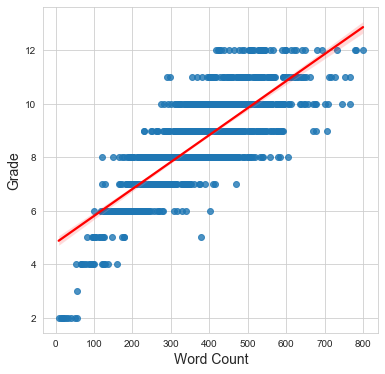

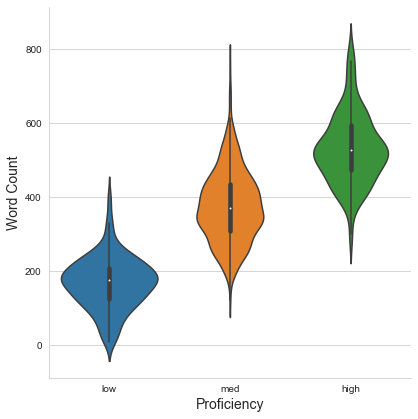

In [57]:
'''
Lexical complexity keys:
'Maas', 'HD-D', 'MTLD', 'MWL', 'MXWL', 'MS', 'MXS'
'''

corr_report(df_all, 'W', 'Word Count')

### Group essays into 'proficiency' groups based on grade

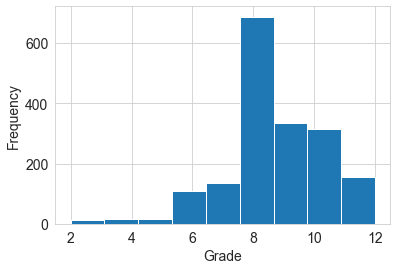

In [368]:
df_all['domain1_score'].hist(bins=9)
plt.xlabel('Grade', size=14)
plt.ylabel('Frequency', size=14)
plt.gcf().set_size_inches(6, 4)

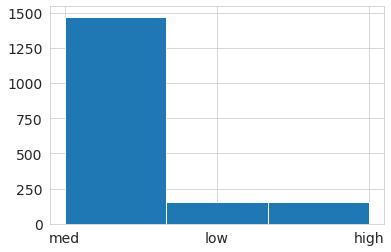

In [88]:
hist = w_df['proficiency'].hist(bins=3)

In [46]:
# [[2 3 4 5 6] [7 8 9 10] [11 12]]
def label_proficiency(row):
    if row['domain1_score'] < 7:
        return 'low'
    elif row['domain1_score'] > 10:
        return 'high'
    else:
        return 'med'

### Generate report for correlation between a given feature and grade

In [56]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


def corr_report(df, feature_id, feature_name):
    print(f'Report for {feature_name}, id=[\'{feature_id}\']\n-------------------------------\n')
    
    ax = sns.regplot(x=feature_id, y='domain1_score', data=df, line_kws={'color':'red'})
    plt.xlabel(feature_name, size=14)
    plt.ylabel('Grade', size=14)
    plt.gcf().set_size_inches(6, 6)
    
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'high')
    high = df[mask]
    print(f'High Proficiency:\n{high[feature_id].describe()}\n\n')
    
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'med')
    med = df[mask]
    print(f'Med Proficiency:\n{med[feature_id].describe()}\n\n')
    
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'low')
    low = df[mask]
    print(f'Low Proficiency:\n{low[feature_id].describe()}\n\n')
    
    ax = sns.catplot(x='proficiency', y=feature_id, data=df, order=['low', 'med', 'high'], dodge=True, kind='violin', aspect=1)

    plt.xlabel('Proficiency', size=14)
    plt.ylabel(feature_name, size=14)
    plt.gcf().set_size_inches(6, 6)
    
    X = df[feature_id]
    y = df['domain1_score']

    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    print(est.summary())
    
    low, med, high = split_by_proficiency(df_all)
    stat, p = stats.levene(low[feature_id], med[feature_id], high[feature_id], center='median')
    if p > 0.05:
        print(f'\np-value of {p} passes levenes median test\n')
    else:
        print(f'\np-value of {p} fails levenes median test\n')
        
    stat, p = stats.levene(low[feature_id], med[feature_id], high[feature_id], center='mean')
    if p > 0.05:
        print(f'\np-value of {p} passes levenes mean test\n')
    else:
        print(f'\np-value of {p} fails levenes mean test\n')
    
    fvalue, pvalue = stats.f_oneway(low[feature_id], med[feature_id], high[feature_id])
    print(f'\nANOVA p-value: {pvalue}\n')

In [52]:
def split_by_proficiency(df):
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'high')
    high = df[mask]
    
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'med')
    med = df[mask]
    
    df['proficiency'] = df.apply(label_proficiency, axis=1)
    mask = (df['proficiency'] == 'low')
    low = df[mask]
    
    return low, med, high

### Statistical Significance

In [290]:
import scipy.stats as stats

low, med, high = split_by_proficiency(df_all)

#Levene's test centered at the median
stats.levene(low['MTLD'], med['MTLD'], high['MTLD'], center='median')

LeveneResult(statistic=1.8132692468865212, pvalue=0.1634211624708409)

In [277]:
from scipy.stats import shapiro

stat, p = shapiro(df_all['MWL'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)


In [285]:
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(low['MTLD'], med['MTLD'], high['MTLD'])
print(fvalue, pvalue)

96.3124509851104 1.9239201172216035e-40


### Descriptive Stats
- Distribution of some of the features?

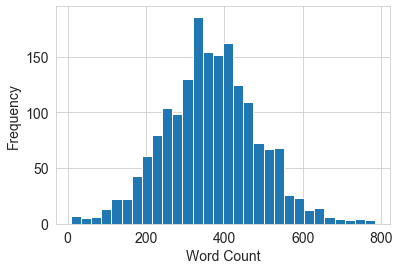

In [350]:
'''
'Maas', 'HD-D', 'MTLD', 'MWL', 'MXWL', 'MS', 'MXS'
'''

df_all['W'].hist(bins=30)
plt.xlabel('Word Count', size=14)
plt.ylabel('Frequency', size=14)
plt.gcf().set_size_inches(6, 4)

In [377]:
len(split_by_proficiency(df_all)[2])

156

### Overall Comparison Plots

In [380]:
def normalise(x):
    if x
    return (x-min(x))/(max(x)-min(x))

In [426]:
labels = ['Maas', 'HD-D', 'MTLD', 'MWL', 'MXWL', 'MS', 'MXS']

for label in labels:
    df_hdd[f'{label}_n'] = normalise(df_hdd[label])

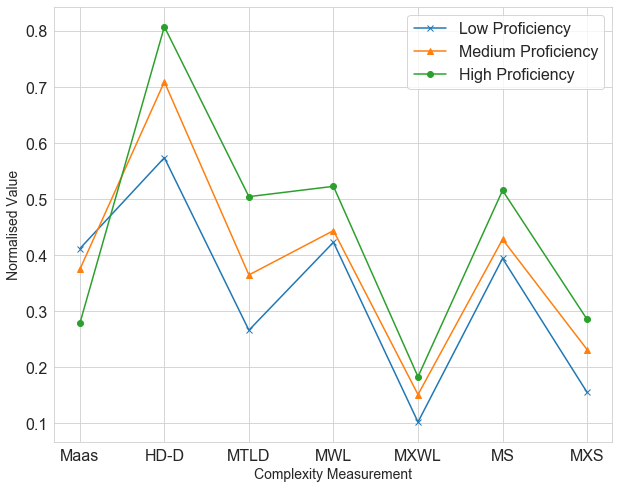

In [427]:
labels = ['Maas', 'HD-D', 'MTLD', 'MWL', 'MXWL', 'MS', 'MXS']
low, med, high = split_by_proficiency(df_hdd)

low_mean = [low[f'{key}_n'].mean() for key in labels]
med_mean = [med[f'{key}_n'].mean() for key in labels]
high_mean = [high[f'{key}_n'].mean() for key in labels]

plt.plot(labels, low_mean, '-x', label='Low Proficiency')
plt.plot(labels, med_mean, '-^', label='Medium Proficiency')
plt.plot(labels, high_mean, '-o', label='High Proficiency')
plt.gcf().set_size_inches(10, 8)
plt.legend()
plt.rc('legend', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.xlabel('Complexity Measurement')
plt.ylabel('Normalised Value')
plt.show()

### Examples from dataset for writeup

In [26]:
df_all[df_all['domain1_score'] == 12]['essay'].values[0]

'Dear @ORGANIZATION1, The computer blinked to life and an image of a blonde haired girl filled the screen. It was easy to find out how life was in @LOCATION2, thanks to the actual @CAPS1 girl explaining it. Going to the library wouldn\'t have filled one with this priceless information and human interection. Computers are a nessessity of life if soceity wishes to grow and expand. They should be supported because they teach hand eye coordination, give people the ability to learn about faraway places, and allow people to talk to others online. Firstly, computers help teach hand eye coordination. Hand-eye coordination is a useful ability that is usod to excel in sports. In a recent survey, @PERCENT1 of kids felt their hand eye coordination improves after computer use. Even a simple thing like tying can build up this skill. Famous neurologist @CAPS2 @PERSON1 stated in an article last week that, "@CAPS3 and computer strength the @CAPS2. When on the computer, you automatically process what th